# Casestudy_Unsupervised learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Wine dataset

wine_data = pd.read_csv("Wine_clust .csv")

In [3]:
wine_data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [4]:
wine_data.shape

(178, 13)

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
wine_data.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [7]:
# Checking null values

wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
#checking duplicates

wine_data.duplicated().sum()

0

In [9]:
#sns.boxplot(x = wine_data["Total_Phenols"])

### Preprocessing

#### Scaling

In [10]:
 
wine = wine_data.copy()

# Importing and Initializing Standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(wine)

### Modeling 

### K Means clustering model

In [11]:
# let the value of K be 4
K = 4

from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=K, random_state=42, init="k-means++", n_init= "auto")

kmeans_model.fit(x_scaled)

wine["Clusters"] = kmeans_model.predict(x_scaled)

C:\Users\Unni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
wine.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Clusters  
0   3.92     1065         2  
1   3.40     1050         2  
2   3.17     1185         2  
3   3.45     1480         2  
4   2.93      735         2

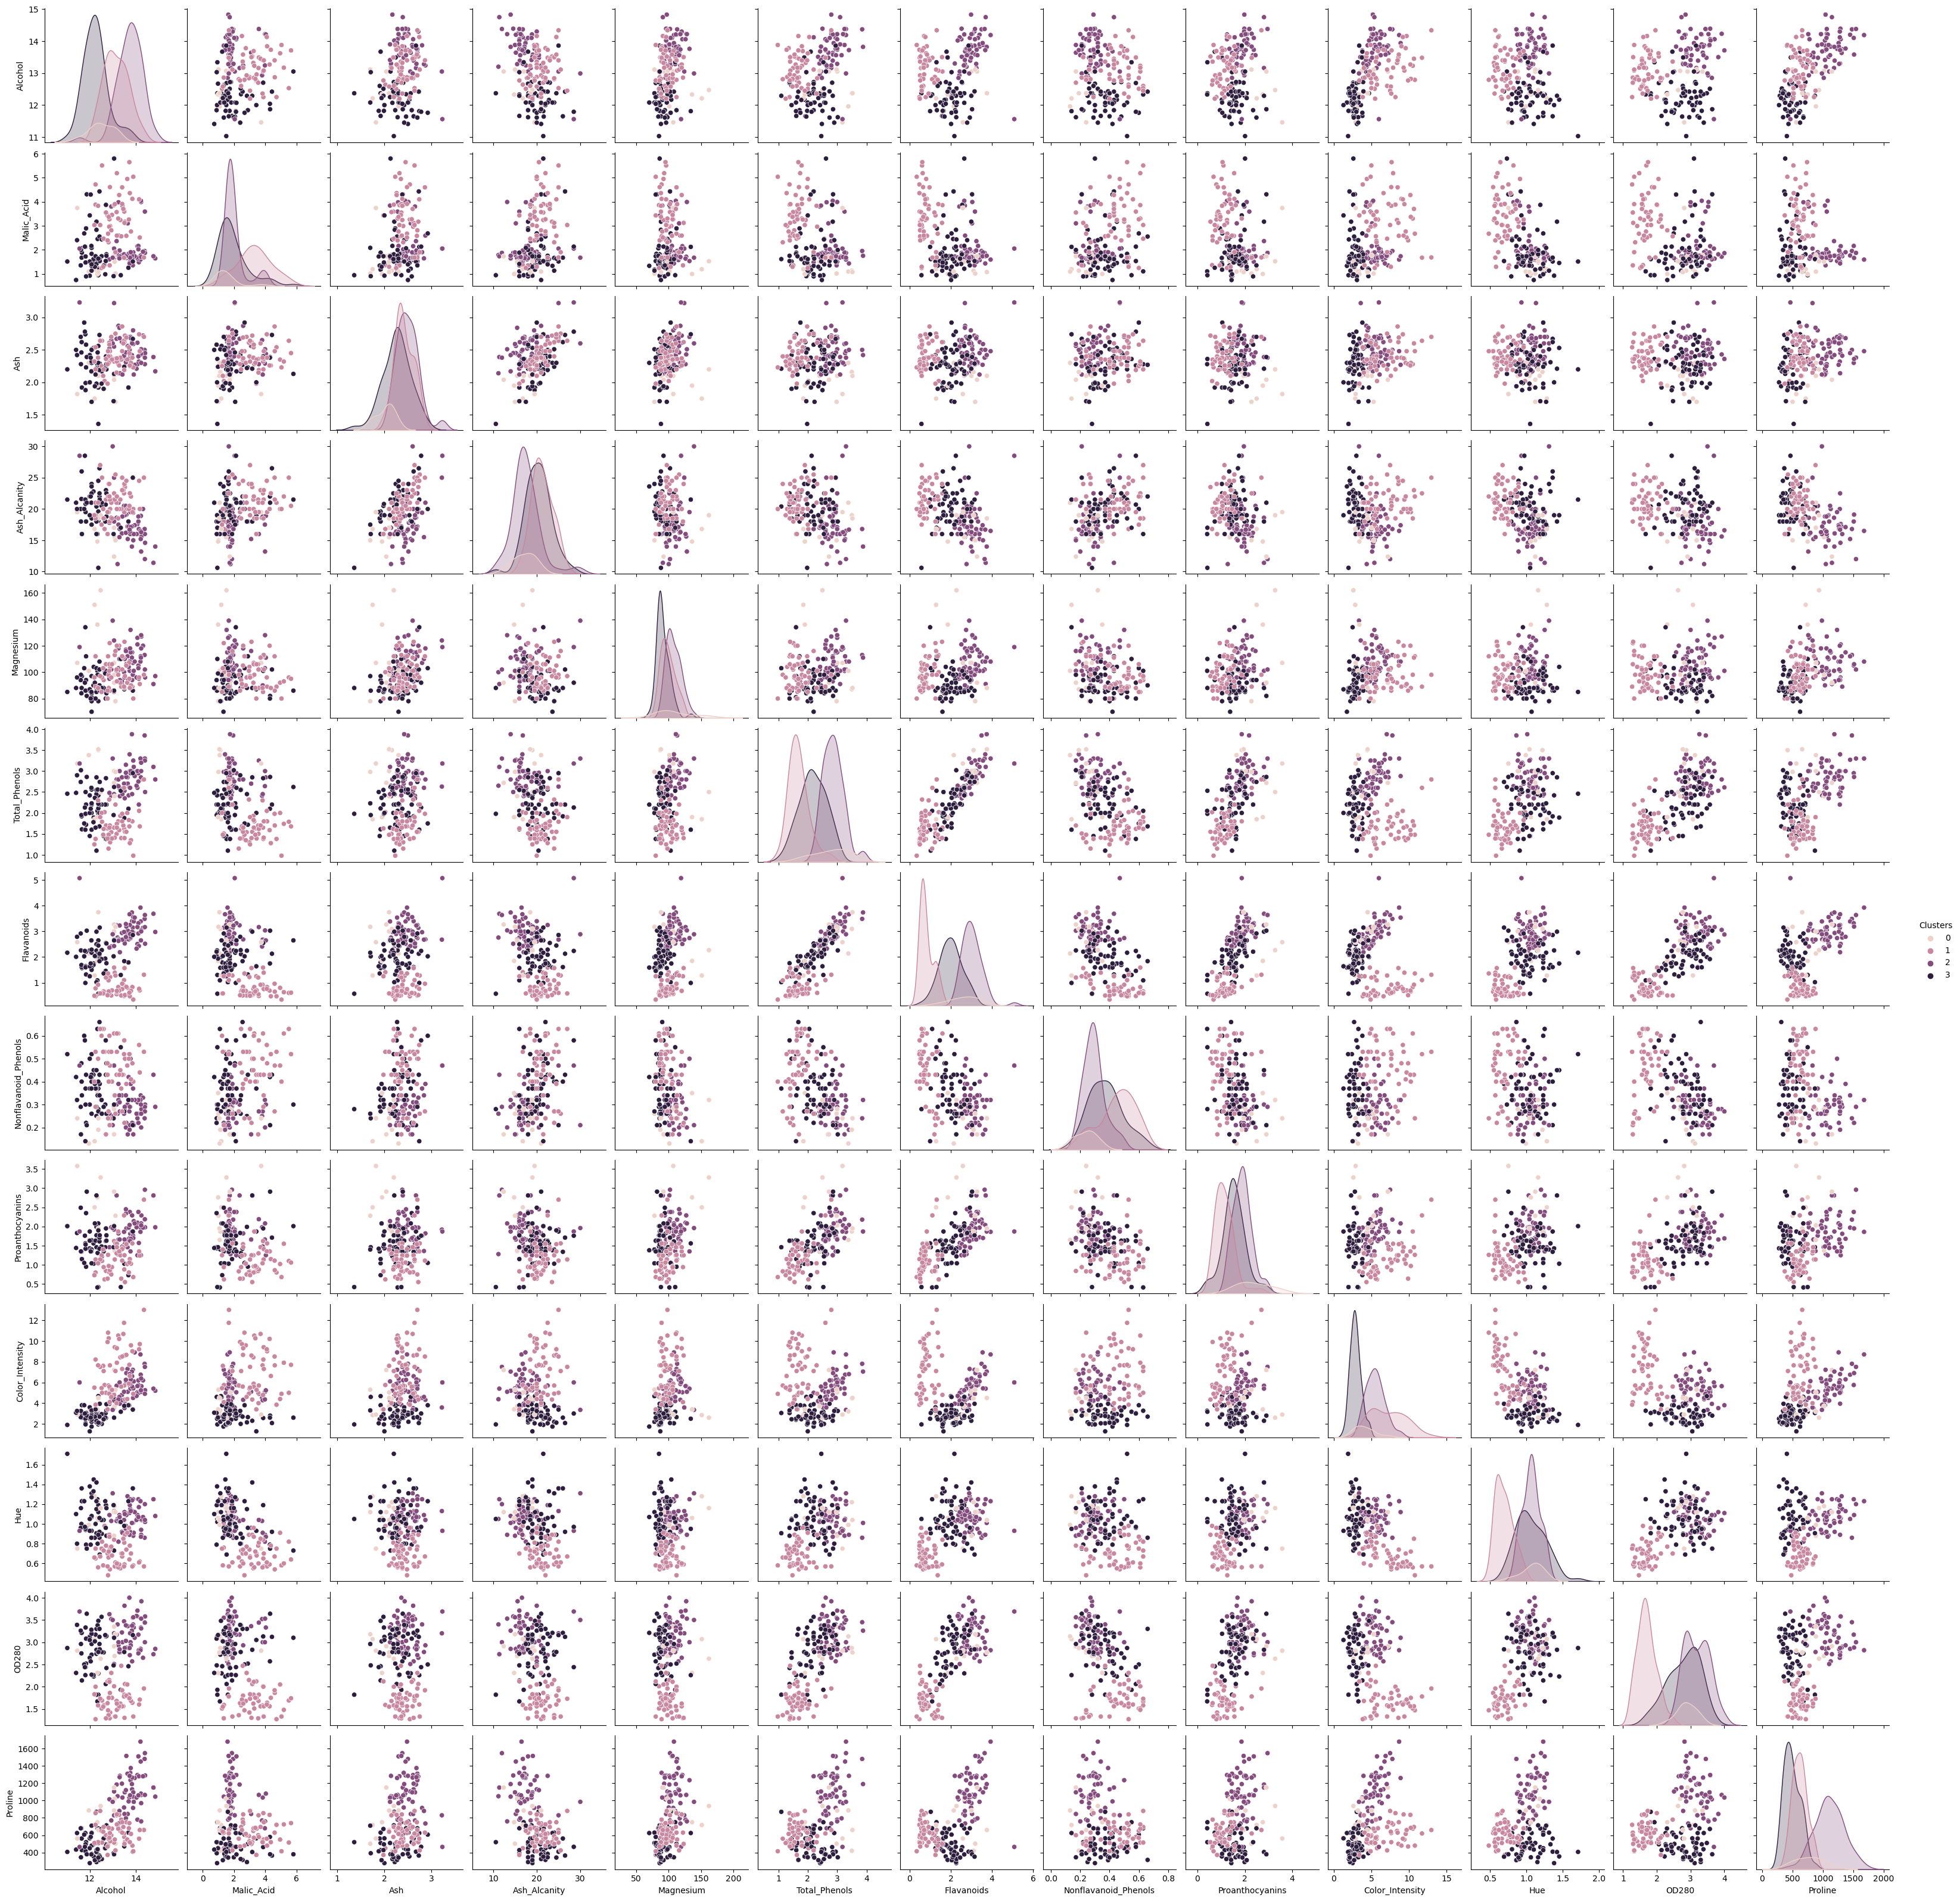

In [13]:
# Displaying the clusters with every feature in the dataset

sns.pairplot(data = wine, hue="Clusters")

In [14]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Clusters'],
      dtype='object')

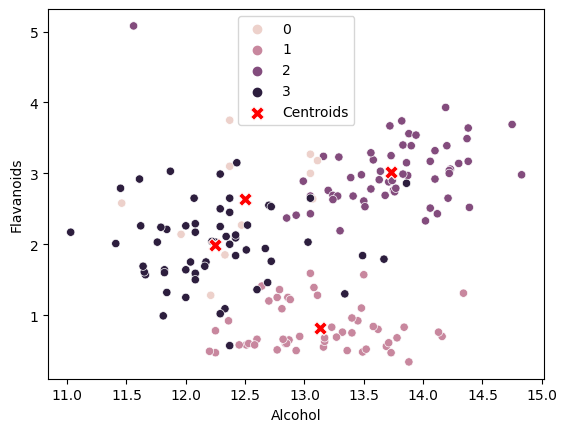

In [15]:
# Inverse transforming the centeroid values and converting to Dataframe
centroids = pd.DataFrame(scaler.inverse_transform(kmeans_model.cluster_centers_), columns=wine_data.columns)

#ploting
sns.scatterplot(data = wine, x = "Alcohol", y = "Flavanoids", hue = "Clusters")
sns.scatterplot(data = centroids, x='Alcohol', y='Flavanoids', marker='X',color='red', label='Centroids',s=100)

plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")
plt.show()

In [16]:
# Finding Inertia value for K = 4

inertia = kmeans_model.inertia_

print("Inertia: ", inertia)

Inertia:  1211.7531134671583


In [17]:
# Finding optimal value for K using Elbow method


k_range = range(1,11)
inertia_values = []

for K in k_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(wine[["Alcohol", "Flavanoids"]])
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    

C:\Users\Unni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Unni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Unni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Unni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

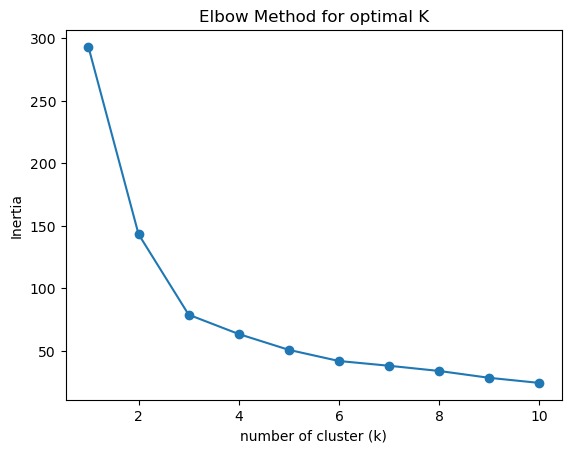

In [18]:
# plotting the K values and its coresponding inertia values

plt.plot(k_range, inertia_values, marker = "o")
plt.title("Elbow Method for optimal K")
plt.xlabel("number of cluster (k)")
plt.ylabel("Inertia")
plt.show()

In [19]:
# From the Elbow method the optimal value of K is 3. Training the kmeans model with K=3
wine_k3 = wine_data.copy()

K = 3

km_model = KMeans(n_clusters=K, n_init="auto")

wine_k3["Cluster"] = km_model.fit_predict(x_scaled)

C:\Users\Unni\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
wine_k3.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        1  
1   3.40     1050        1  
2   3.17     1185        1  
3   3.45     1480        1  
4   2.93      735        1

In [21]:
plt.style.use('dark_background')

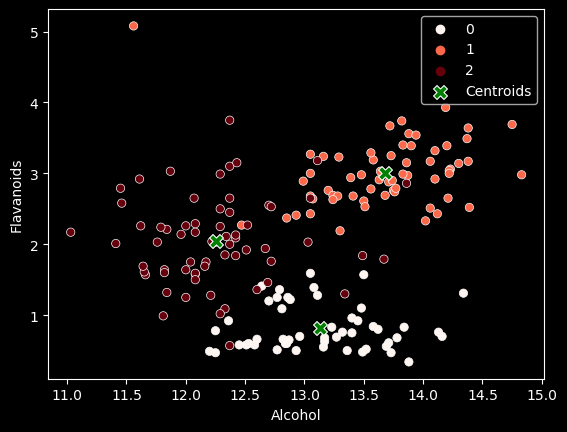

In [22]:
# Representing Clusters and centroid using scatter plot on two features from the dataset

# Inverse transforming the centeroid values and converting to Dataframe
centroids_k3 = pd.DataFrame(scaler.inverse_transform(km_model.cluster_centers_), columns=wine_data.columns)
#ploting

sns.scatterplot(data = wine_k3, x = "Alcohol", y = "Flavanoids", hue = "Cluster", palette="Reds")
sns.scatterplot(data = centroids_k3, x='Alcohol', y='Flavanoids', marker='X',color='green', label='Centroids',s=100)


plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")
plt.show()

In [23]:
# Finding Inertia value for K = 3
inertia = km_model.inertia_

print("Inertia: ", inertia)

Inertia:  1277.928488844642


In [24]:
# Evaluation of the K Means model

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(wine_k3[["Alcohol","Flavanoids"]], wine_k3["Cluster"])
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.4337912173575917


### Agglomerative Clustering

In [25]:
# Importing and initializing Agglomerative Clustering

wine_ag = wine_data.copy()


from sklearn.cluster import AgglomerativeClustering

agg_cluster_model = AgglomerativeClustering(n_clusters=5, affinity="euclidean")

wine_ag["Cluster"] = agg_cluster_model.fit_predict(x_scaled)

C:\Users\Unni\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
wine_ag.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        0  
1   3.40     1050        0  
2   3.17     1185        0  
3   3.45     1480        0  
4   2.93      735        0

In [27]:
# Evaluation of the Agglomerative  model

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(wine_ag[["Alcohol","Flavanoids"]], wine_ag["Cluster"])
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.20363531642904548


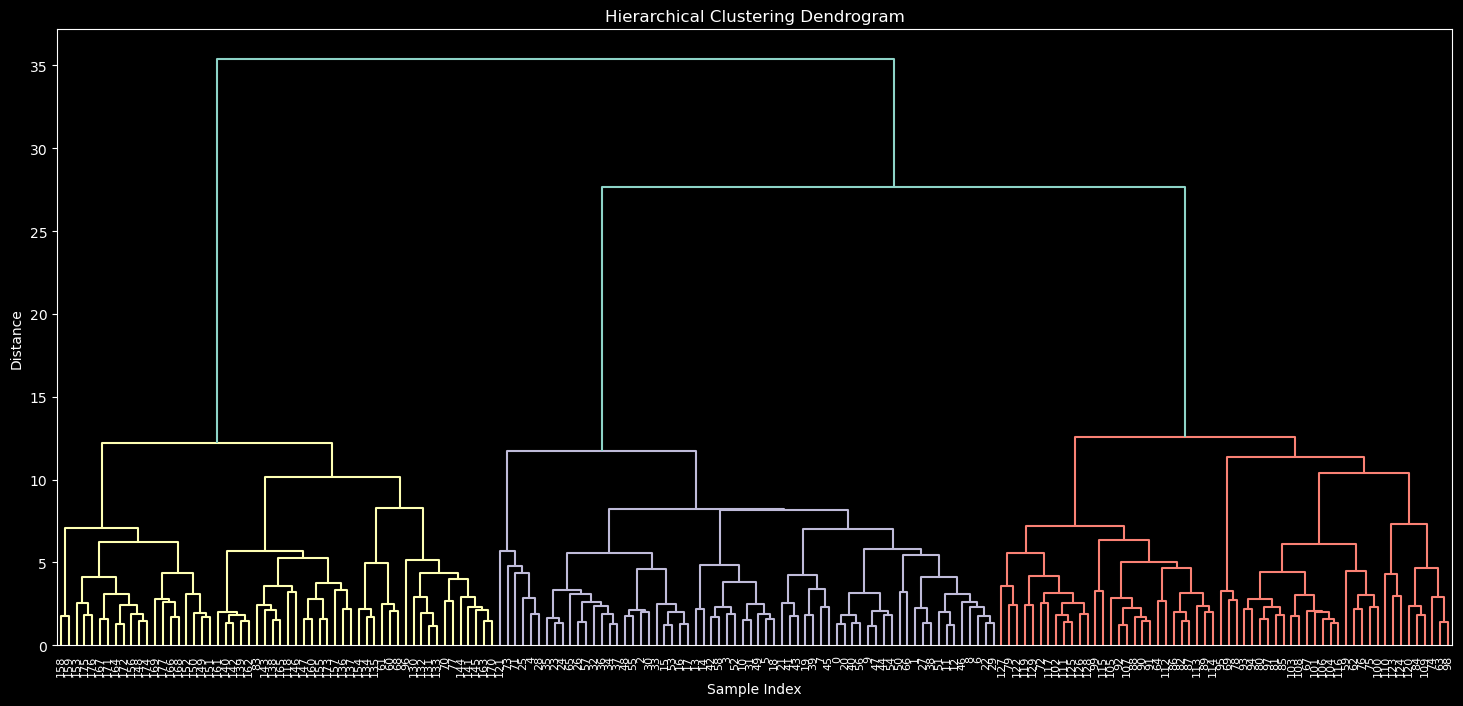

In [28]:
# Dendogram

from scipy.cluster.hierarchy import dendrogram, linkage

ag_linkage = linkage(x_scaled, method="ward")


plt.figure(figsize=(18,8))
dendrogram(ag_linkage, labels=wine_ag.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [29]:
# Finding optimal value for K 


k_range = range(2,11)
silhouette_values = []

for K in k_range:
    agg_model = AgglomerativeClustering(n_clusters=K)
    Labels = agg_model.fit_predict(x_scaled)
    
    # finding silhouette score using two features "Alcohol" and "Flavanoids" from the dataset
    sc_score = silhouette_score(wine[["Alcohol", "Flavanoids"]], Labels)
    silhouette_values.append(sc_score)

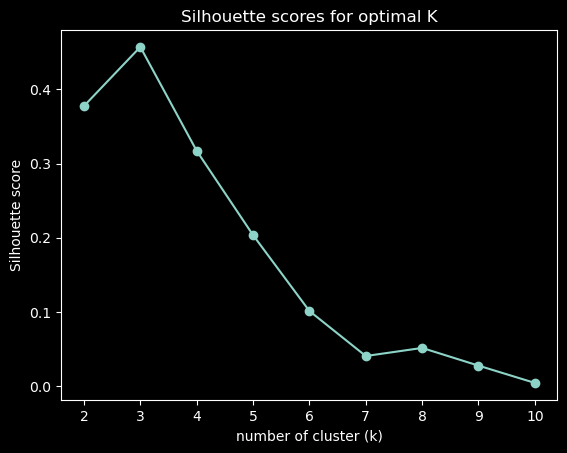

In [30]:
# plotting the K values and its coresponding silhoutte score 

plt.plot(k_range, silhouette_values, marker = "o")
plt.title("Silhouette scores for optimal K")
plt.xlabel("number of cluster (k)")
plt.ylabel("Silhouette score")
plt.show()

* Here I have used the Silhouette score for finding the optimal K value. Higher the silhouette score represents more optimal K value. From the above plot the highest silhouette score is obtained when the value of K is 3.

In [31]:
# Agglomerative Clustering with K = 3

agg_k2 = wine_data.copy()

K_agg = 3

agg_cluster_model2 = AgglomerativeClustering(n_clusters = K_agg, affinity="euclidean")

agg_k2["Cluster"] = agg_cluster_model2.fit_predict(x_scaled)
cluster =  agg_cluster_model2.fit_predict(x_scaled)

C:\Users\Unni\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Unni\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [32]:
agg_k2.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        2  
1   3.40     1050        2  
2   3.17     1185        2  
3   3.45     1480        2  
4   2.93      735        2

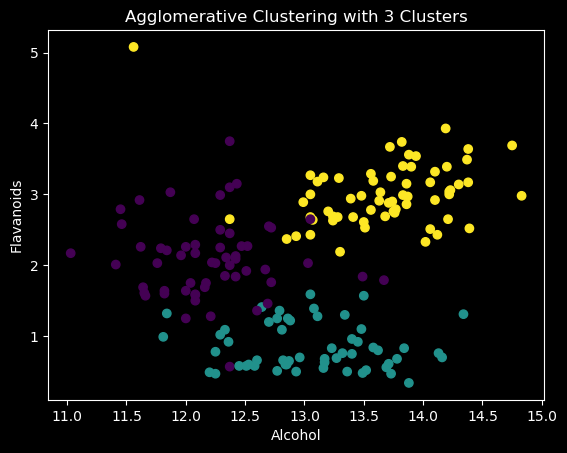

In [33]:
#visualizing the clusters

plt.scatter(agg_k2["Alcohol"], agg_k2["Flavanoids"], c=cluster, cmap='viridis')
plt.title('Agglomerative Clustering with 3 Clusters')
plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")
plt.show()

In [34]:
# Evaluation of the Agglomerative  model

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(agg_k2[["Alcohol","Flavanoids"]], agg_k2["Cluster"])
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.4571562000010572


### DBSCAN

In [35]:
# Importing and Initializing DBSCAN clustering model

db_wine = wine_data.copy()

from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=2, min_samples=5)
db_wine["Cluster"] = dbscan_model.fit_predict(x_scaled)
label = dbscan_model.fit_predict(x_scaled)

In [36]:
db_wine["Cluster"].value_counts()

-1    85
 0    66
 4     9
 1     8
 2     5
 3     5
Name: Cluster, dtype: int64

In [37]:
X_np = db_wine.values

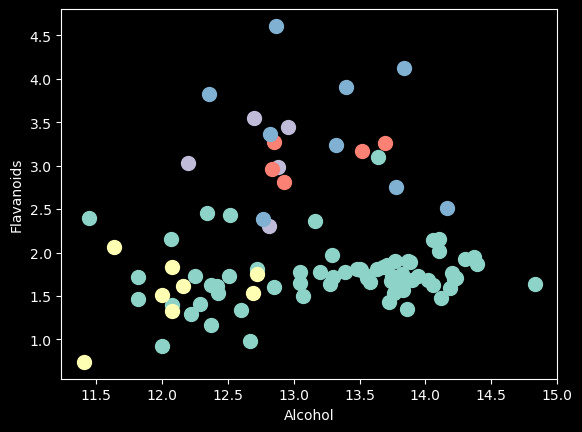

In [38]:
#visualizing the clusters

for cluster_label in range(5):
    plt.scatter(X_np[label == cluster_label, 0],X_np[label == cluster_label, 1],s=100, label=f'Cluster {cluster_label}')
    

plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")
plt.show()

In [39]:
# Evaluation of the  DBSCAN model

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(db_wine[["Alcohol","Flavanoids"]], db_wine["Cluster"])
print("Silhouette score:", silhouette_avg)

Silhouette score: -0.1511844961643794
